In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# Load the CSV file into a Pandas DataFrame

df = pd.read_csv('normalizedPOUS.csv')
#df = pd.read_csv('normalized_smol.csv')

# Convert Unix epoch column to datetime objects

#Convert datetime to Unix epoch
df['datetime2']=pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
#df['epoch'] = (df['datetime'] - dt.datetime(1970,1,1)).dt.total_seconds()


for col in df.columns:
    print(col)
    
    
    
counties = df['CountyName']
counties = list(set(counties))
counties = sorted(counties)

Unnamed: 0
UtilityName
StateName
CountyName
CountyFIPS
CustomersTracked
CustomersOut
RecordDateTime
datetime
datetime2


In [2]:


for county in counties:
    
    county_data = df.loc[df['CountyName'] == county]
    print(f"start date: {min(county_data['datetime2'])}  end date: {max(county_data['datetime2'])} {county}")

start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:52:46 Alameda
start date: 2021-09-29 18:31:29  end date: 2023-03-20 20:23:17 Alpine
start date: 2021-09-29 18:31:29  end date: 2023-03-20 22:38:37 Amador
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:10:39 Butte
start date: 2021-09-29 18:31:29  end date: 2023-03-20 22:27:35 Calaveras
start date: 2021-09-29 18:31:29  end date: 2023-03-20 19:15:40 Colusa
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:42:08 Contra Costa
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:52:46 El Dorado
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:52:46 Fresno
start date: 2021-09-29 18:31:29  end date: 2023-03-20 02:53:58 Glenn
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:10:40 Humboldt
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:42:08 Kern
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:21:02 Kings
start date: 2021-09-29 18:31:29  end date: 2023-03-20 23:32:12 Lake
start date: 

In [3]:

# make dataframes of resampled data at 10 minute intervals
resampled_outages = {}
resampled_percent = {}

for county in sorted(counties):
#for county in ['Alameda']:

    print(f"resampling {county}")
    county_data = df.loc[df['CountyName'] == county]
    cd = county_data.drop_duplicates(subset='datetime2', keep='first', inplace=False, ignore_index=True)
    #cust = (df['CustomersOut'] / df['TotalCustomers']) * 100
    percent = cd['CustomersOut']/cd['CustomersTracked']
    # Set the 'datetime' column as the index
    percent.index =  pd.to_datetime(cd['datetime2']) 
    resampled_percent[county] = percent.resample('10T').ffill()

    outages = cd['CustomersOut']
    # Set the 'datetime' column as the index
    outages.index =  pd.to_datetime(cd['datetime2']) 
    resampled_outages[county] = percent.resample('10T').ffill()

o_df = pd.DataFrame(resampled_outages)
o_df = o_df.fillna(0)

p_df = pd.DataFrame(resampled_percent)
p_df = p_df.fillna(0)



resampling Alameda
resampling Alpine
resampling Amador
resampling Butte
resampling Calaveras
resampling Colusa
resampling Contra Costa
resampling El Dorado
resampling Fresno
resampling Glenn
resampling Humboldt
resampling Kern
resampling Kings
resampling Lake
resampling Lassen
resampling Los Angeles
resampling Madera
resampling Marin
resampling Mariposa
resampling Mendocino
resampling Merced
resampling Monterey
resampling Napa
resampling Nevada
resampling Placer
resampling Plumas
resampling Sacramento
resampling San Benito
resampling San Francisco
resampling San Joaquin
resampling San Luis Obispo
resampling San Mateo
resampling Santa Barbara
resampling Santa Clara
resampling Santa Cruz
resampling Shasta
resampling Sierra
resampling Siskiyou
resampling Solano
resampling Sonoma
resampling Stanislaus
resampling Sutter
resampling Tehama
resampling Trinity
resampling Tulare
resampling Tuolumne
resampling Unknown
resampling Yolo
resampling Yuba


In [5]:
print(counties)

{'Mendocino', 'San Mateo', 'Sacramento', 'Sierra', 'Tehama', 'San Benito', 'Yuba', 'Santa Clara', 'Santa Cruz', 'Alpine', 'Napa', 'El Dorado', 'Lake', 'Alameda', 'Santa Barbara', 'Merced', 'Sonoma', 'Fresno', 'Stanislaus', 'Kern', 'Tuolumne', 'Unknown', 'Tulare', 'Marin', 'San Francisco', 'Solano', 'Madera', 'Plumas', 'Humboldt', 'Siskiyou', 'Kings', 'Trinity', 'Sutter', 'Mariposa', 'Shasta', 'Glenn', 'Los Angeles', 'Yolo', 'Colusa', 'Monterey', 'Nevada', 'Calaveras', 'Lassen', 'Butte', 'San Luis Obispo', 'Placer', 'San Joaquin', 'Contra Costa', 'Amador'}


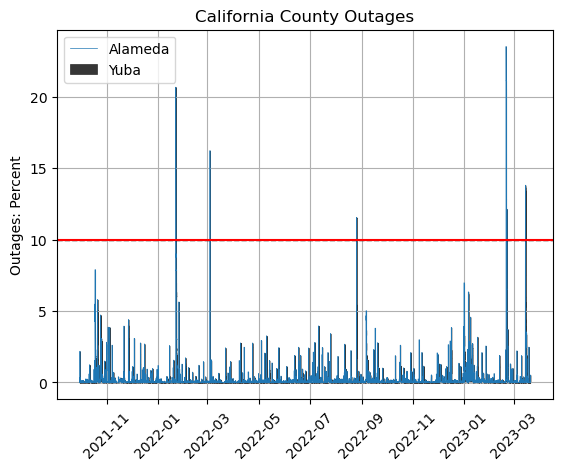

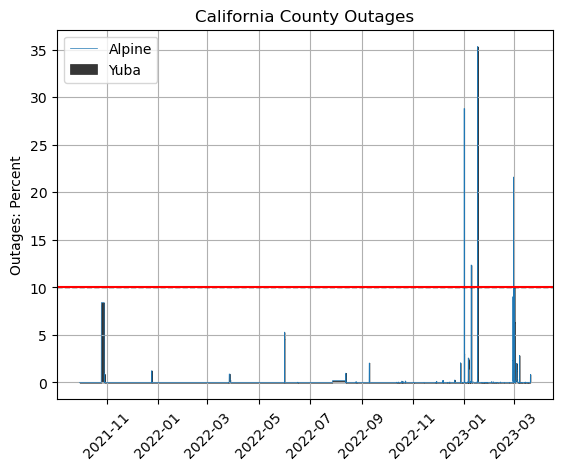

In [7]:
f = plt.figure()  # Create a new figure
for county in counties[0:2]:  
    #print(county_data['CustomersOut']/county_data['CustomersTracked'])

    
    plt.plot(100*p_df[county],
            #cd['datetime2'], 
            #(cd['CustomersOut'), 
            #100.0*(county_data['CustomersOut']/county_data['CustomersTracked']), 
            label=county,
            linewidth=0.5 ) # Plot the column data and set the label as the column name
    

    cust_days = resampled_percent[county]
    
    plt.fill_between(
        x=cust_days.index, 
        y1=100*cust_days, 
        color= "#202020",
        alpha= 0.9,
        linewidth=0.5,
        label = cnty)

    plt.axhline(y=10.0, color='#000000', linestyle='--', linewidth=1)


    
    plt.title('California County Outages')  # Set the title
    plt.axhline(y=10., color='r', linestyle='-')
    plt.ylabel('Outages: Percent')  # Set the y-axis label
    plt.xticks(rotation=45)
    plt.grid(True)  # Enable grid lines
    plt.legend()  # Show the legend with column names
    plt.savefig(f'county_plots/{county}-outages.png', bbox_inches='tight', dpi=300)
    plt.savefig(f'county_plots/{county}-outages.png', bbox_inches='tight')
    del(f)

In [13]:

for county in counties:  
    #print(county_data['CustomersOut']/county_data['CustomersTracked'])

    cust_days = resampled_percent[county]

    fig, ax = plt.subplots()

    ax.fill_between(
        x=cust_days.index, 
        y1=100 * cust_days, 
        color="#202020",
        alpha=0.9,
        linewidth=0.5,
        label=cnty
    )

    ax.axhline(y=10.0, color='#000000', linestyle='--', linewidth=1)

    ax.set_title(f'{county} County Outages')  # Set the title
    ax.set_ylabel('Percent Outage')  # Set the y-axis label
    plt.xticks(rotation=45)
    ax.grid(False)  # Enable grid lines

    # Save the plot as both PNG and SVG
    plt.savefig(f'county_plots/{county}-outages.png', bbox_inches='tight', dpi=300)
    plt.savefig(f'county_plots/{county}-outages.svg', bbox_inches='tight')
    plt.close()


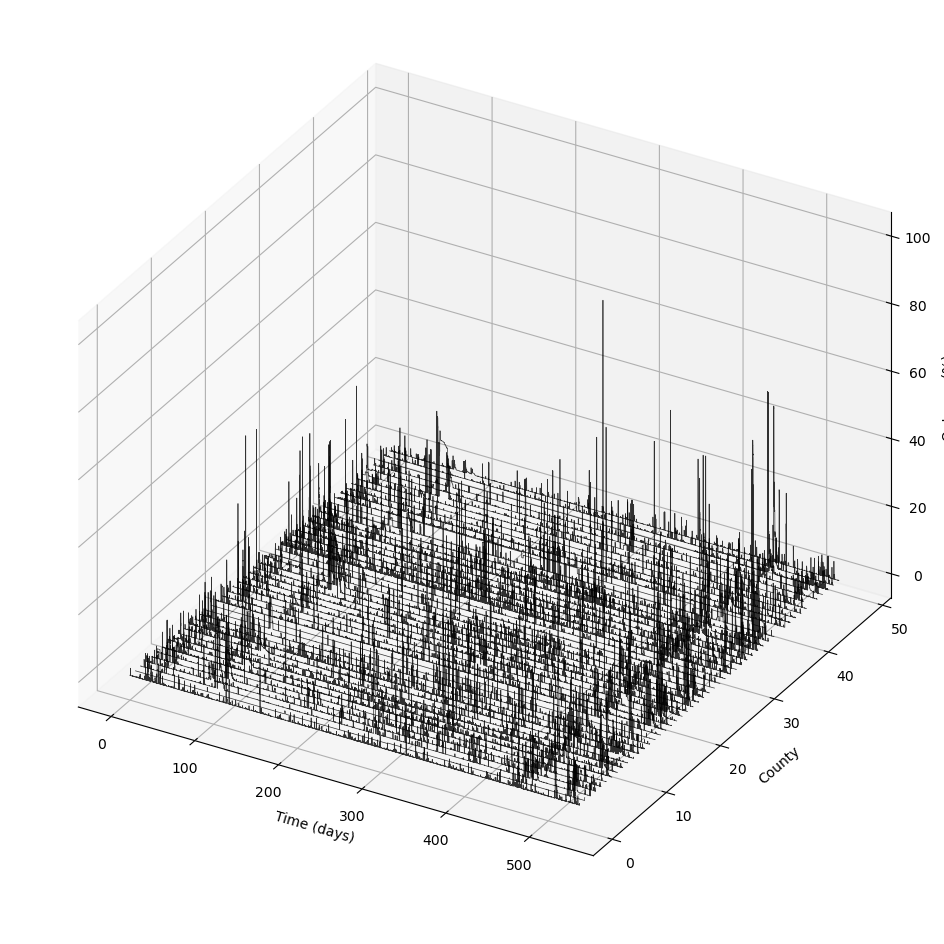

In [23]:
%matplotlib inline
## Plot all columns on the same axis


fig = plt.figure(figsize=(20, 12))  # Set the figure size

ax = fig.add_subplot(projection='3d', proj_type = 'ortho')

#plt.style.use('grayscale')

for i, cnty in enumerate(counties):
    #print(cnty)
    cust_days = resampled_outages[cnty]


    # get array of timedeltas by subtracting 
    timebase = cust_days.index - dt.datetime(1970,1,1)
    # number of timedeltas in a day
    dayn = np.timedelta64(24,'h')
    # convert to number of days since start of data
    timebase = (timebase - timebase[0])/dayn
    ax.plot(xs = timebase,
            ys = 100*cust_days, 
            zs=i, zdir='y', alpha=0.8, color='k', linewidth=0.5)  # Plot the column data and set the label as the column name


#plt.axhline(y=10.0, color='#000000', linestyle='--')




ax.set_xlabel('Time (days)')
ax.set_ylabel('County')
ax.set_zlabel('Outages (%)')

# Create a transparent plane at z=10%
#ax.set_zlim(0, 100)  # Adjust the z-axis limits if necessary
# Create a transparent plane at z=10%
plane_y = 10
#x = np.arange(min(cust_days.index.astype('int64')), max(cust_days.index.astype('int64')) + 1)
#x = np.linspace(min(cust_days.index.astype('int64')), max(cust_days.index.astype('int64')), 100)  # X values from 0 to 1
z = np.arange(len(counties)) # Y values from 0 to 1
#X, Z = np.meshgrid(x, x)
#Y = X * Z 
#ax.plot_surface(X,
#                np.full_like(Y, plane_y),
#                Z,
#                color='red', alpha=0.5)

#ax.set_yticks(list(counties))

plt.savefig('threedee-thresh-ortho.png',  dpi=600)
#plt.savefig('threedee-thresh-ortho.svg', bbox_inches='tight')
plt.savefig('threedee-thresh-ortho.svg')
plt.show()  # Show the plot


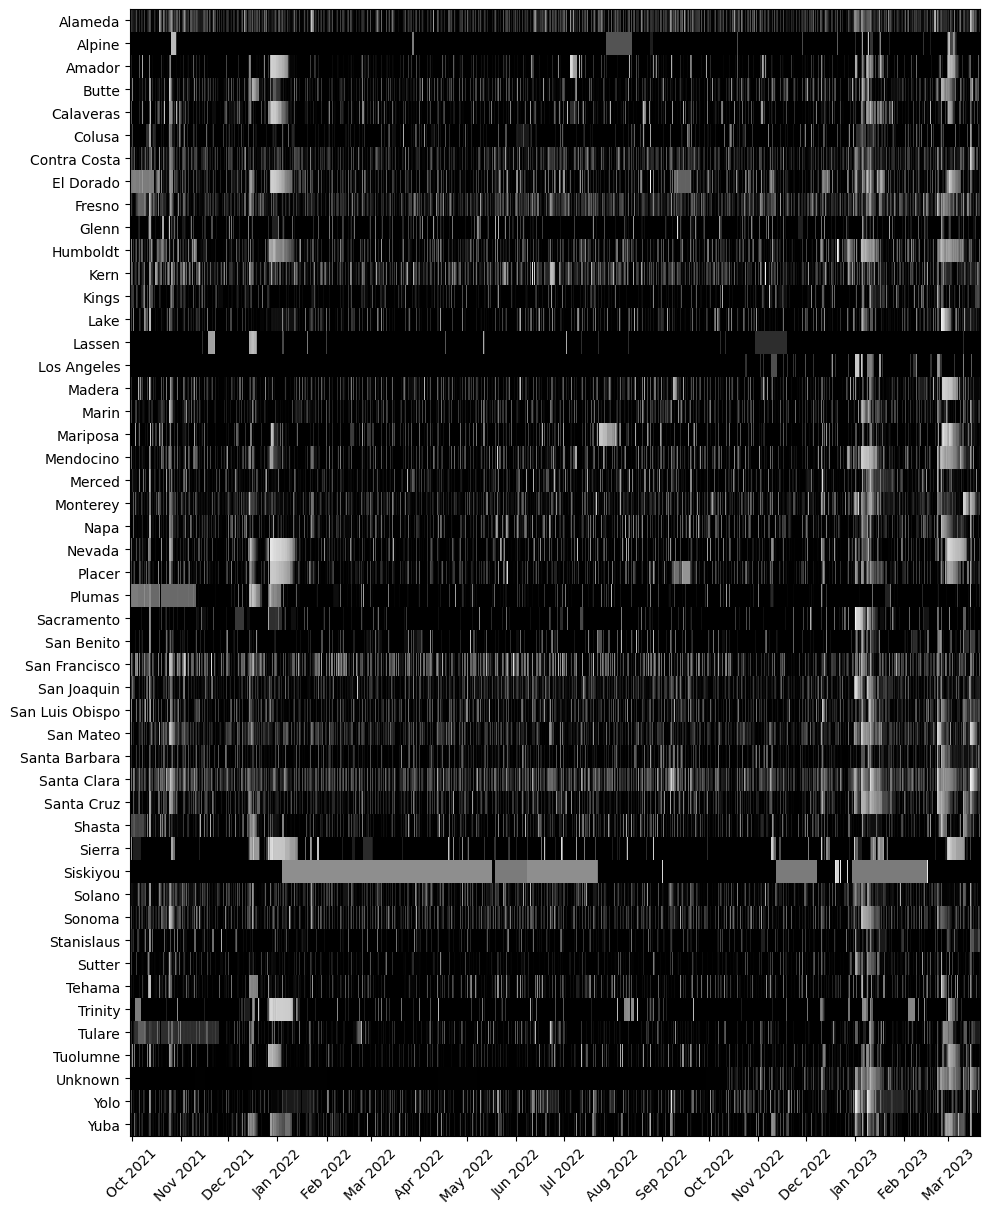

In [22]:

data = o_df

# Get the x-axis values using the converted datetime values
x = data.index

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, len(counties) * 0.25))


# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, np.arange(data.shape[1]));

mesh = ax.pcolormesh(X, Y, np.log(data.T + .0001) , cmap='gist_yarg_r')
# Add horizontal grid lines
yticks = np.arange(len(data.columns)) + 0.5
ax.set_yticks(yticks, minor=False)
#ax.set_yticks(yticks, minor=True)
ax.grid(axis='y', linestyle='-', linewidth=0.5, color='gray', which='minor')


# Set the x-axis label and format the tick labels as months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

# Add y-axis tick labels with column header names
plt.yticks(np.arange(len(counties)), counties)
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation
plt.gca().invert_yaxis()

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('county-img-log-RIBS.png', bbox_inches='tight', dpi=600);
plt.savefig('county-img-log-RIBS.svg', bbox_inches='tight');



In [69]:
from datetime import datetime 
import pytz 
   
# using the timezone() function 
zone = pytz.timezone('CST6CDT') 
   
# using the localize() function 
date_zone = zone.localize( datetime( 2022, 5, 16,
                         9, 15, 32 ), is_dst = None ) 
   
# printing the values 
print( "DateTime Time zone:", date_zone )

DateTime Time zone: 2022-05-16 09:15:32-05:00


/tmp/ipykernel_2164444/1375168315.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


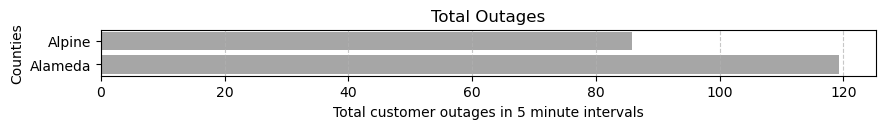

In [24]:
# plot county marginals (summed over time)



columns_to_plot = rdf.columns

# Calculate the sum of each selected column
column_sums = rdf[columns_to_plot].sum()

# Convert the column names and sums into lists
column_names = column_sums.index.tolist()
column_sums_values = column_sums.tolist()

plt.figure(figsize=(10, len(column_names) * 0.3))

# Plotting the horizontal bar chart
plt.barh(column_names, column_sums_values, alpha=0.7, color='gray')
plt.xlabel('Total customer outages in 5 minute intervals')
plt.ylabel('Counties')
plt.title('Total Outages')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('county-bar-marginal', bbox_inches='tight', dpi=600)
plt.show()



In [ ]:
# plot time marginal (summed over counties)



columns_to_plot = df.columns[3:-1]

# Calculate the sum of each selected column
row_sums = df[columns_to_plot].sum(axis=1)


row_sums_values = row_sums.tolist()
time_axis = 

plt.figure(figsize=(10, 6))

# Plotting the horizontal bar chart
plt.bar(df.columns['epoch'], row_sums_values, alpha=0.7, color='gray')
plt.xlabel('Total customer outages for all counties')
plt.ylabel('Outages')
plt.title('Time')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('time-marginal', bbox_inches='tight', dpi=600)
plt.show()



In [ ]:


# Prepare the data for the image plot
data = df.iloc[:, 3:-1].values  # Extract the numerical data from columns 2 to 10



# Plot the data as an image
#plt.figure(figsize=(10, 6))  # Set the figure size
plt.figure(figsize=(10, len(column_names) * 0.3))

plt.imshow(data.T, aspect='auto', cmap='plasma', origin='lower', interpolation='nearest')  # Plot the transposed data as an image
plt.colorbar(label='Value')  # Add a colorbar with label

plt.yticks(np.arange(len(df.columns[3:-1])), df.columns[3:-1])
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation


# # Set the x-axis label and format the tick labels as months or days
months_locator = mdates.MonthLocator()  # Show tick labels at the beginning of each month
days_locator = mdates.DayLocator()  # Show tick labels at the beginning of each day
date_formatter = mdates.DateFormatter('%b %Y')  # Format tick labels as "Abbreviated Month Year" (e.g., Jan 2022)


#plt.gca().xaxis.set_minor_locator(days_locator)  # Set the minor tick locator to days
plt.gca().xaxis.set_major_formatter(date_formatter)  # Set the tick label formatter

# Reduce the number of x-axis ticks
max_ticks = 10
months_locator = mdates.MonthLocator(interval=max(1, int(len(df) / max_ticks)))  # Create a new MonthLocator instance with the desired interval
plt.gca().xaxis.set_major_locator(months_locator)  # Set the updated locator

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

plt.tight_layout()  # Adjust the spacing between subplots
#plt.show()  # Show the plot
plt.savefig('county-img.png', bbox_inches='tight', dpi=600);

In [ ]:



# Prepare the data for the image plot
data = df.iloc[:, 3:-1].values  # Extract the numerical data from columns 2 to 10

# Get the x-axis values using the converted datetime values
x = df['Timestamp'].values

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, np.arange(data.shape[1]))

# Plot the data as a colored mesh
#linear
#mesh = ax.pcolormesh(X, Y, data.T, cmap='plasma')

#log
mesh = ax.pcolormesh(X, Y, np.log(data.T + 1) , cmap='gist_yarg_r')

# Add a colorbar with label
plt.colorbar(mesh, ax=ax, label='Outages (log scale)')
#plt.colorbar(mesh, ax=ax, label='Outages (linear scale)')


# Add horizontal grid lines
yticks = np.arange(len(df.columns[3:-1])) + 0.5
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.grid(axis='y', linestyle='-', linewidth=0.5, color='gray', which='minor')



# Set the x-axis label and format the tick labels as months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better readability

# Add y-axis tick labels with column header names
plt.yticks(np.arange(len(df.columns[3:-1])), df.columns[3:-1])
plt.yticks(rotation=0)  # Rotate y-axis tick labels to horizontal orientation

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('county-img-log-gist_yarg_r.png', bbox_inches='tight', dpi=600);

<Figure size 640x480 with 0 Axes>

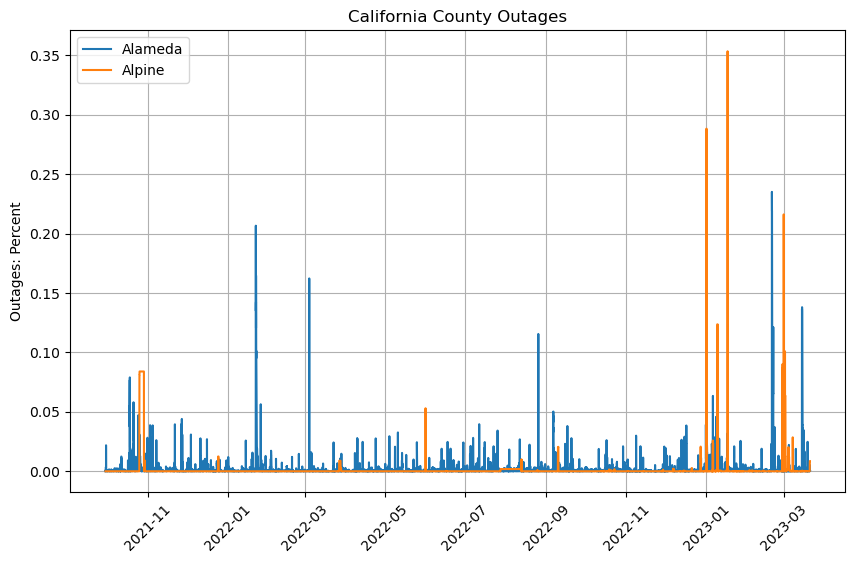

In [14]:

## Plot all columns on the same axis
plt.figure()  # Create a new figure
# Plot columns 2 through 10 on the same axis
plt.figure(figsize=(10, 6))  # Set the figure size

# resample and plot each county

resampled = {}

for county in sorted(counties):
#for county in ['Alameda']:

    
    county_data = df.loc[df['CountyName'] == county]
    cd = county_data.drop_duplicates(subset='datetime2', keep='first', inplace=False, ignore_index=True)
    #cust = (df['CustomersOut'] / df['TotalCustomers']) * 100
    cust = cd['CustomersOut']/cd['CustomersTracked']
    # Set the 'datetime' column as the index
    cust.index =  pd.to_datetime(cd['datetime2']) 

    # resample to minutes
    cust_days = cust.resample('10T').ffill()
    resampled[county] = cust_days
    
    #print(county_data['CustomersOut']/county_data['CustomersTracked'])
    plt.plot(cust_days,
            #cd['datetime2'], 
            #(cd['CustomersOut'), 
            #100.0*(county_data['CustomersOut']/county_data['CustomersTracked']), 
            label=county)  # Plot the column data and set the label as the column name
    

plt.title('California County Outages')  # Set the title
#plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Outages: Percent')  # Set the y-axis label
plt.xticks(rotation=45)
plt.grid(True)  # Enable grid lines
plt.legend()  # Show the legend with column names
#plt.savefig('county-time.png', bbox_inches='tight', dpi=600)
#plt.savefig('county-time.svg', bbox_inches='tight')